In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
import os
from pathlib import Path
curr_dir = Path(os.getcwd())
data_dir = file_path = curr_dir / 'train_FD001_phase_1.csv'
df = pd.read_csv(data_dir, delimiter=",")

In [81]:
df = df.drop('Unnamed: 0', axis = 1)

In [82]:
df.head()

,Engine no,Num cycles,Operating 1,Operating 2,Operating 3,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,...,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Stage
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,0


In [83]:
df.shape

(20630, 27)

In [84]:
train_df = df[df["Engine no"] <= 80]
test_df = df[df["Engine no"] > 80]
train_df.shape, test_df.shape

((16137, 27), (4493, 27))

In [85]:
train_df.head()

,Engine no,Num cycles,Operating 1,Operating 2,Operating 3,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,...,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Stage
0,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
1,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
2,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
3,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
4,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669,0


In [86]:
test_df.head()

,Engine no,Num cycles,Operating 1,Operating 2,Operating 3,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,...,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Stage
16137,81,1,-0.0050,0.0003,100.0,518.67,642.04,1589.91,1406.63,14.62,...,2388.04,8134.78,8.4455,0.03,391,2388,100.0,38.87,23.3365,3
16138,81,2,0.0023,0.0002,100.0,518.67,642.65,1586.25,1407.88,14.62,...,2388.07,8140.37,8.4573,0.03,392,2388,100.0,38.91,23.3452,2
16139,81,3,-0.0005,0.0005,100.0,518.67,642.55,1586.42,1396.40,14.62,...,2388.06,8139.75,8.4522,0.03,394,2388,100.0,39.04,23.3610,1
16140,81,4,-0.0001,-0.0000,100.0,518.67,642.41,1594.89,1404.86,14.62,...,2388.04,8144.12,8.4403,0.03,392,2388,100.0,38.77,23.4206,1
16141,81,5,0.0024,0.0002,100.0,518.67,643.41,1590.49,1409.58,14.62,...,2388.12,8139.21,8.3971,0.03,392,2388,100.0,39.04,23.3311,1


In [87]:
all_sensors = [f"Sensor {i}" for i in range(1, 22)]
sensors_to_keep = [2, 3, 4, 7, 9, 11, 12, 14, 15, 17, 20, 21]
sensor_names = [f"Sensor {i}" for i in sensors_to_keep]
sensors_to_drop = list(set(all_sensors) - set(sensor_names))
train_df = train_df.drop(columns=sensors_to_drop)
test_df = test_df.drop(columns=sensors_to_drop)


In [88]:
train_df = train_df.drop(columns=['Operating 1', 'Operating 2', 'Operating 3'])
test_df = test_df.drop(columns=['Operating 1', 'Operating 2', 'Operating 3'])

In [89]:
train_df.head()

,Engine no,Num cycles,Sensor 2,Sensor 3,Sensor 4,Sensor 7,Sensor 9,Sensor 11,Sensor 12,Sensor 14,Sensor 15,Sensor 17,Sensor 20,Sensor 21,Stage
0,1,2,642.15,1591.82,1403.14,553.75,9044.07,47.49,522.28,8131.49,8.4318,392,39.00,23.4236,0
1,1,3,642.35,1587.99,1404.20,554.26,9052.94,47.27,522.42,8133.23,8.4178,390,38.95,23.3442,0
2,1,4,642.35,1582.79,1401.87,554.45,9049.48,47.13,522.86,8133.83,8.3682,392,38.88,23.3739,0
3,1,5,642.37,1582.85,1406.22,554.00,9055.15,47.28,522.19,8133.80,8.4294,393,38.90,23.4044,0
4,1,6,642.10,1584.47,1398.37,554.67,9049.68,47.16,521.68,8132.85,8.4108,391,38.98,23.3669,0


In [90]:
test_df.head()

,Engine no,Num cycles,Sensor 2,Sensor 3,Sensor 4,Sensor 7,Sensor 9,Sensor 11,Sensor 12,Sensor 14,Sensor 15,Sensor 17,Sensor 20,Sensor 21,Stage
16137,81,1,642.04,1589.91,1406.63,553.78,9060.49,47.53,522.09,8134.78,8.4455,391,38.87,23.3365,3
16138,81,2,642.65,1586.25,1407.88,553.70,9064.32,47.39,522.07,8140.37,8.4573,392,38.91,23.3452,2
16139,81,3,642.55,1586.42,1396.40,553.28,9058.66,47.39,521.07,8139.75,8.4522,394,39.04,23.3610,1
16140,81,4,642.41,1594.89,1404.86,554.25,9056.54,47.59,521.68,8144.12,8.4403,392,38.77,23.4206,1
16141,81,5,643.41,1590.49,1409.58,553.50,9058.47,47.24,521.47,8139.21,8.3971,392,39.04,23.3311,1


In [91]:
buffer = 3
df_list = []

for engine_id, df_engine in train_df.groupby('Engine no'):
    df_engine = df_engine.sort_values(by='Num cycles').reset_index(drop=True)
    label_map = {}

    for stage in df_engine['Stage'].unique():
        stage_df = df_engine[df_engine['Stage'] == stage]
        if stage_df.empty:
            continue

        transition_idxs = stage_df.index[stage_df['Stage'].diff().shift(-1) != 0].tolist()
        if not transition_idxs:
            continue

        transition_idx = transition_idxs[0]
        transition_cycle = df_engine.loc[transition_idx, 'Num cycles']

        for idx in stage_df.index:
            cycle = df_engine.loc[idx, 'Num cycles']
            if (transition_cycle - cycle) > buffer:
                label_map[idx] = transition_cycle - cycle

    df_engine['time_to_next_stage'] = df_engine.index.map(label_map)
    df_list.append(df_engine)

train_df = pd.concat(df_list).reset_index(drop=True)

In [92]:
train_df.head()

,Engine no,Num cycles,Sensor 2,Sensor 3,Sensor 4,Sensor 7,Sensor 9,Sensor 11,Sensor 12,Sensor 14,Sensor 15,Sensor 17,Sensor 20,Sensor 21,Stage,time_to_next_stage
0,1,2,642.15,1591.82,1403.14,553.75,9044.07,47.49,522.28,8131.49,8.4318,392,39.00,23.4236,0,73.0
1,1,3,642.35,1587.99,1404.20,554.26,9052.94,47.27,522.42,8133.23,8.4178,390,38.95,23.3442,0,72.0
2,1,4,642.35,1582.79,1401.87,554.45,9049.48,47.13,522.86,8133.83,8.3682,392,38.88,23.3739,0,71.0
3,1,5,642.37,1582.85,1406.22,554.00,9055.15,47.28,522.19,8133.80,8.4294,393,38.90,23.4044,0,70.0
4,1,6,642.10,1584.47,1398.37,554.67,9049.68,47.16,521.68,8132.85,8.4108,391,38.98,23.3669,0,69.0


In [93]:
df_list_test = []

for engine_id, df_engine in test_df.groupby('Engine no'):
    df_engine = df_engine.sort_values(by='Num cycles').reset_index(drop=True)
    label_map = {}

    for stage in df_engine['Stage'].unique():
        stage_df = df_engine[df_engine['Stage'] == stage]
        if stage_df.empty:
            continue

        transition_idxs = stage_df.index[stage_df['Stage'].diff().shift(-1) != 0].tolist()
        if not transition_idxs:
            continue

        transition_idx = transition_idxs[0]
        transition_cycle = df_engine.loc[transition_idx, 'Num cycles']

        for idx in stage_df.index:
            cycle = df_engine.loc[idx, 'Num cycles']
            if (transition_cycle - cycle) > buffer:
                label_map[idx] = transition_cycle - cycle

    df_engine['time_to_next_stage'] = df_engine.index.map(label_map)
    df_list_test.append(df_engine)

test_df = pd.concat(df_list_test).reset_index(drop=True)

In [94]:
# Define sensors to keep and number of lag features
sensors_to_keep = [f"Sensor {i}" for i in [2, 3, 4, 7, 9, 11, 12, 14, 15, 17, 20, 21]]
lag_features = 3

# Function to add lag features
def add_lag_features(df, lag_features, sensors_to_keep):
    for sensor in sensors_to_keep:
        for lag in range(1, lag_features + 1):
            df[f"{sensor}_lag_{lag}"] = df.groupby('Engine no')[sensor].shift(lag)
    return df

# Add lag features to both train and test sets
train_df = add_lag_features(train_df, lag_features, sensors_to_keep)
test_df = add_lag_features(test_df, lag_features, sensors_to_keep)

# Create final list of features to use
feature_cols = sensors_to_keep + [
    f"{sensor}_lag_{lag}"
    for sensor in sensors_to_keep
    for lag in range(1, lag_features + 1)
]

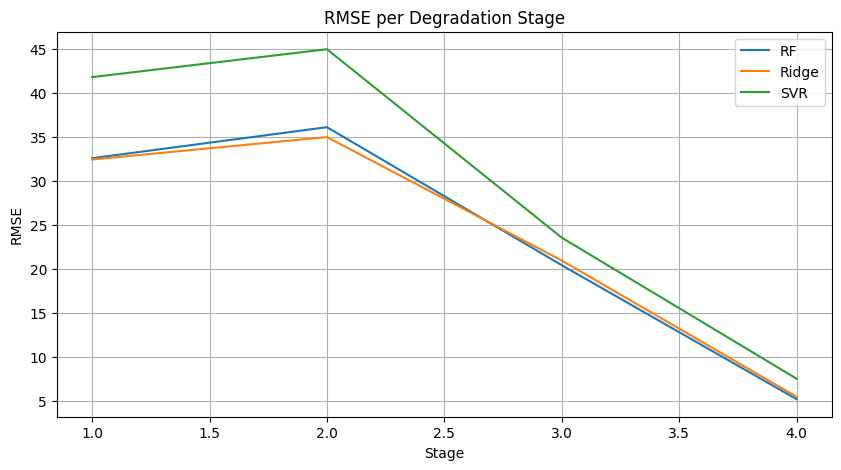

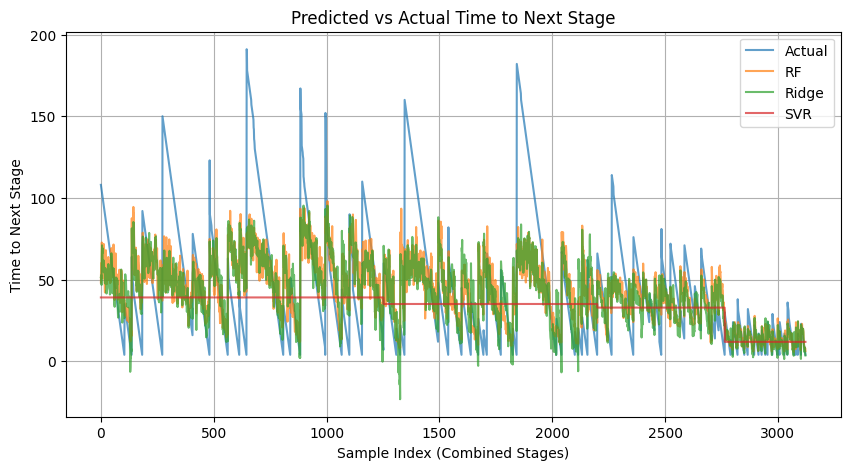

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

stage_rmses = {model: [] for model in ['RF', 'Ridge', 'SVR']}
stage_preds = {model: [] for model in ['RF', 'Ridge', 'SVR']}
stage_actuals = []

for s in range(1, 5):
    train_subset = train_df[(train_df['Stage'] == s)].copy()
    test_subset = test_df[(test_df['Stage'] == s)].copy()

    # Drop rows with NaNs in features or target
    train_subset = train_subset.dropna(subset=feature_cols + ['time_to_next_stage'])
    test_subset = test_subset.dropna(subset=feature_cols + ['time_to_next_stage'])

    X_train = train_subset[feature_cols]
    y_train = train_subset['time_to_next_stage']

    X_test = test_subset[feature_cols]
    y_test = test_subset['time_to_next_stage']

    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

    svr = SVR()
    svr.fit(X_train, y_train)
    y_pred_svr = svr.predict(X_test)
    rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

    stage_rmses['RF'].append(rmse_rf)
    stage_rmses['Ridge'].append(rmse_ridge)
    stage_rmses['SVR'].append(rmse_svr)

    stage_preds['RF'].extend(y_pred_rf)
    stage_preds['Ridge'].extend(y_pred_ridge)
    stage_preds['SVR'].extend(y_pred_svr)
    stage_actuals.extend(y_test)

# Plot RMSE per stage
plt.figure(figsize=(10, 5))
for model in ['RF', 'Ridge', 'SVR']:
    plt.plot(range(1, 5), stage_rmses[model], label=model)
plt.xlabel('Stage')
plt.ylabel('RMSE')
plt.title('RMSE per Degradation Stage')
plt.legend()
plt.grid(True)
plt.show()

# Plot predicted vs actuals
plt.figure(figsize=(10, 5))
plt.plot(stage_actuals, label='Actual', alpha=0.7)
for model in ['RF', 'Ridge', 'SVR']:
    plt.plot(stage_preds[model], label=model, alpha=0.7)
plt.xlabel('Sample Index (Combined Stages)')
plt.ylabel('Time to Next Stage')
plt.title('Predicted vs Actual Time to Next Stage')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def print_metrics(y_true, y_pred, label="Model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.3f}")

In [97]:
# For test set
print_metrics(y_test, y_pred_rf, "Random Forest (Test)")
print_metrics(y_test, y_pred_ridge, "Ridge (Test)")
print_metrics(y_test, y_pred_svr, "SVR (Test)")


Random Forest (Test) - RMSE: 5.23, MAE: 4.11, R²: 0.486
Ridge (Test) - RMSE: 5.51, MAE: 4.37, R²: 0.431
SVR (Test) - RMSE: 7.56, MAE: 5.90, R²: -0.072


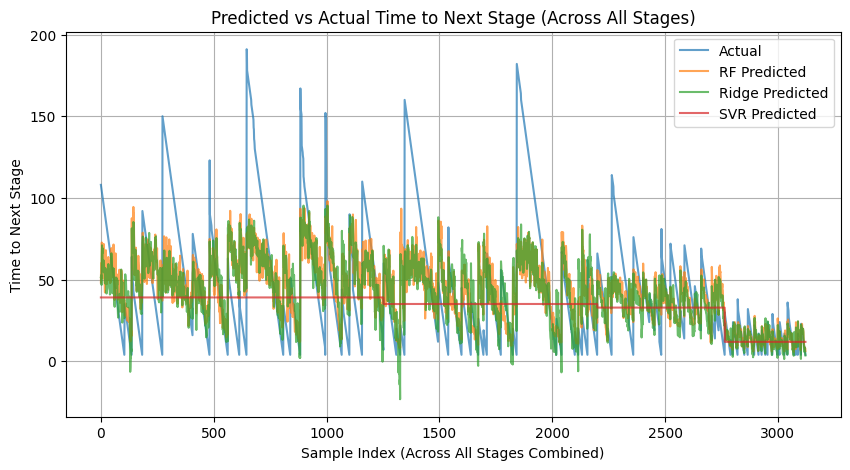

In [98]:
# Plot predicted vs actuals (Sample Index vs Time to Next Stage)
plt.figure(figsize=(10, 5))

# Plot actual values
plt.plot(stage_actuals, label='Actual', alpha=0.7)

# Plot predictions for each model
for model in ['RF', 'Ridge', 'SVR']:
    plt.plot(stage_preds[model], label=f'{model} Predicted', alpha=0.7)

plt.xlabel('Sample Index (Across All Stages Combined)')
plt.ylabel('Time to Next Stage')
plt.title('Predicted vs Actual Time to Next Stage (Across All Stages)')
plt.legend()
plt.grid(True)
plt.show()